In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import csv
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

# Download indonesian stopwords

In [2]:
nltk.download('stopwords')
stopwords_indonesia = stopwords.words('indonesian')

# Tampilkan beberapa contoh stopwords bahasa Indonesia
print(stopwords_indonesia[:20])

['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thori\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Removing Stop words

In [3]:
def remove_stopwords(sentence):
    
    # Sentence converted to lowercase-only
    sentence = sentence.lower()

    words = sentence.split()
    no_words = [w for w in words if w not in stopwords_indonesia]
    sentence = " ".join(no_words)

    return sentence

# Function Load Dataset

In [4]:
def load_dataset(filename, stopwords_remove):
    sentences = []
    labels = []

    with open(filename, "r") as file:
        reader = csv.reader(file, delimiter=",")
        next(reader)
        for row in reader:
            sentences.append(remove_stopwords(row[0]) if stopwords_remove == True else row[0])
            labels.append(int(row[1]))

    return sentences, labels

# Load Dataset From CSV

In [5]:
csvDataset = "./DatasetCSV/Dataset_fix.csv"
csvValidation = "./DatasetCSV/Validation_Dataset.csv"

train_sentences , train_labels = load_dataset(csvDataset, True)
validation_sentences, validation_labels = load_dataset(csvValidation, False)


In [6]:
# print(len(train_sentences))
#sample
# for i in range(10):
#     print(train_sentences[i])

sum([len(word) for word in train_sentences])


80905

Setting Utiliti Untuk Knobs

In [6]:
vocab_size = 1000
oov = "<OOV>"
padding = "post"
truncate = "post"
embedding_dim = 8
max_length = 25

# Set Up Tokenizer

In [7]:
#set Tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov)
#Fit on texts get the word index
tokenizer.fit_on_texts(train_sentences)
[[x, y] for x, y in tokenizer.word_index.items()][-20:]
# print(tokenizer.word_index)

[['individual', 1060],
 ['penyetrikahan', 1061],
 ['canggih', 1062],
 ['avant', 1063],
 ['garde', 1064],
 ['futuristik', 1065],
 ['casual', 1066],
 ['vintage', 1067],
 ['antik', 1068],
 ['penghalusan', 1069],
 ['kerutan', 1070],
 ['kainnya', 1071],
 ['bakteri', 1072],
 ['kelembutan', 1073],
 ['perlindungan', 1074],
 ['uv', 1075],
 ['biasa', 1076],
 ['prosesnya', 1077],
 ['dihargai', 1078],
 ['menolong', 1079]]

# Sequences The dataset

In [9]:
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding=padding, maxlen=max_length, truncating=truncate)

validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, padding=padding, maxlen=max_length, truncating=truncate)

train_labels=np.array(train_labels)
validation_labels=np.array(validation_labels)
train_labels = np.expand_dims(train_labels, axis=1)
validation_labels = np.expand_dims(validation_labels, axis=1)

In [10]:
print(train_padded.shape)
print(validation_padded.shape)
print(train_labels.shape)
print(validation_labels.shape)
print(train_labels)

(1636, 25)
(258, 25)
(1636, 1)
(258, 1)
[[0]
 [0]
 [0]
 ...
 [4]
 [4]
 [4]]


# Stop The callbacks When Val_Accuracy Reach 85%

In [11]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy') >= 0.85): # Experiment with changing this value
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

# Creating The model and Tuning The model

In [18]:
# model = tf.keras.Sequential([
#         # tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
#         # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
#         # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
#         # tf.keras.layers.Flatten(),
#         # tf.keras.layers.Dense(128, activation='relu'),
#         # # tf.keras.layers.Dropout(0.2),
#         # tf.keras.layers.Dense(64, activation='relu'),
#         # #tf.keras.layers.Dropout(0.3),
#         # tf.keras.layers.Dense(5, activation='softmax')
#     ])

# model = tf.keras.Sequential([
#         tf.keras.layers.Embedding(vocab_size, embedding_dim),
#         tf.keras.layers.Dropout(0.2),
#         tf.keras.layers.GlobalAveragePooling1D(),
#         tf.keras.layers.Dropout(0.2),
#         tf.keras.layers.Dense(5, activation='softmax')
# ])

# model = tf.keras.Sequential([
#     tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
#     tf.keras.layers.Dense(24, activation="relu"),
#     tf.keras.layers.Dense(5, activation="softmax")
# ])

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(4)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(5, activation="softmax")
])
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 25, 8)             8000      
                                                                 
 bidirectional_4 (Bidirecti  (None, 8)                 416       
 onal)                                                           
                                                                 
 dropout_8 (Dropout)         (None, 8)                 0         
                                                                 
 dense_12 (Dense)            (None, 8)                 72        
                                                                 
 dense_13 (Dense)            (None, 5)                 45        
                                                                 
Total params: 8533 (33.33 KB)
Trainable params: 8533 (33.33 KB)
Non-trainable params: 0 (0.00 Byte)
___________________

In [19]:
history = model.fit(train_padded, train_labels,epochs=40, validation_data=(validation_padded, validation_labels), callbacks=[callbacks])

Epoch 1/40
52/52 [==============================] - 3s 16ms/step - loss: 1.6004 - accuracy: 0.2445 - val_loss: 1.5994 - val_accuracy: 0.3140
Epoch 2/40
52/52 [==============================] - 0s 6ms/step - loss: 1.5536 - accuracy: 0.3698 - val_loss: 1.5563 - val_accuracy: 0.3953
Epoch 3/40
52/52 [==============================] - 0s 6ms/step - loss: 1.4354 - accuracy: 0.3612 - val_loss: 1.4486 - val_accuracy: 0.4806
Epoch 4/40
52/52 [==============================] - 0s 7ms/step - loss: 1.2691 - accuracy: 0.3967 - val_loss: 1.2773 - val_accuracy: 0.4884
Epoch 5/40
52/52 [==============================] - 0s 6ms/step - loss: 1.1228 - accuracy: 0.4688 - val_loss: 1.1538 - val_accuracy: 0.4961
Epoch 6/40
52/52 [==============================] - 0s 6ms/step - loss: 1.0323 - accuracy: 0.5513 - val_loss: 1.0797 - val_accuracy: 0.5349
Epoch 7/40
52/52 [==============================] - 0s 6ms/step - loss: 0.9473 - accuracy: 0.5844 - val_loss: 1.0538 - val_accuracy: 0.5426
Epoch 8/40
52/52 [=

# Plot The Accuracy and validation

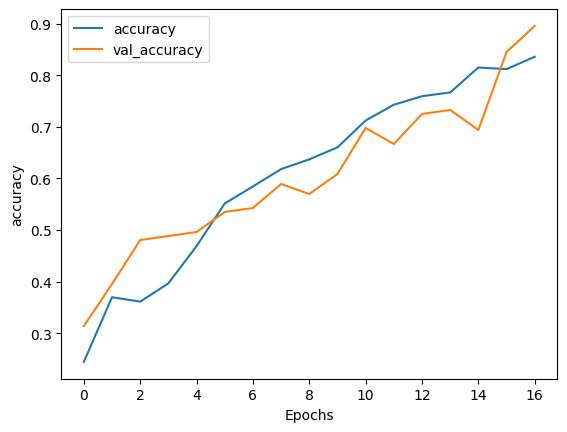

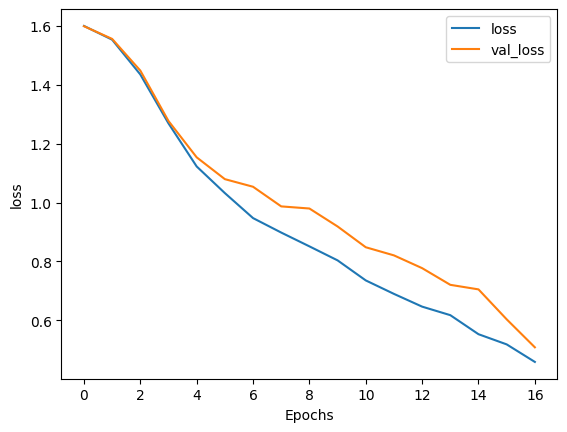

In [20]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, f'val_{metric}'])
    plt.show()
    
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

# Save Model

In [21]:
model.save("Model_Mihu_85acc.h5")

c:\Users\thori\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Save Index Word

In [8]:
print(tokenizer.index_word)

{1: '<OOV>', 2: 'pakaian', 3: 'bantuan', 4: 'layanan', 5: 'pembersihan', 6: 'menyetrika', 7: 'pindah', 8: 'bersihkan', 9: 'membantu', 10: 'saya', 11: 'periksa', 12: 'mencari', 13: 'tinggal', 14: 'jasa', 15: 'berbeda', 16: 'membutuhkan', 17: 'baru', 18: 'khusus', 19: 'ganti', 20: 'penyetrikaan', 21: 'membersihkan', 22: 'proses', 23: 'menawarkan', 24: 'dukungan', 25: 'alamat', 26: 'mencuci', 27: 'menyewa', 28: 'memiliki', 29: 'sesuaikan', 30: 'sesuai', 31: 'relokasi', 32: 'lokasi', 33: 'cuci', 34: 'debu', 35: 'perubahan', 36: 'air', 37: 'rumah', 38: 'lampu', 39: 'setrika', 40: 'suhu', 41: 'dapatkah', 42: 'kamar', 43: 'anda', 44: 'teratur', 45: 'perawatan', 46: 'baju', 47: 'lemari', 48: 'itu', 49: 'hidup', 50: 'mesin', 51: 'butuh', 52: 'kepindahan', 53: 'menyediakan', 54: 'transisi', 55: 'atur', 56: 'barang', 57: 'jendela', 58: 'menangani', 59: 'bahan', 60: 'menerima', 61: 'sampah', 62: 'oven', 63: 'kain', 64: 'pintu', 65: 'noda', 66: 'filter', 67: 'laundry', 68: 'lap', 69: 'lain', 70: 'b

In [ ]:
import pickle
with open('tokenizer_index_word.pkl', 'wb') as file:
    pickle.dump(tokenizer.index_word, file)